In [5]:
#빈 캔버스 만들기
def init() : 
  blank = np.zeros([512,512],dtype=np.uint8)
  blank.fill(0)
  blank = cv2.resize(blank,(512,512))
  
  return blank
  
def drawNp(img):
  blank = init()
  #print(img.shape[0])
  for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
      if img[i][j] == 1 :
        blank[i][j] = 255

  return blank

In [8]:

def coorMaxMin(file):
  minX, minY = (file.loc[0][0],file.loc[0][1])
  maxX, maxY = (file.loc[0][0],file.loc[0][1])
  for i in range(0,file.shape[0]):
    x = file.loc[i][0]
    y = file.loc[i][1]
    if x > maxX :
      maxX = x
    if x < minX :
      minX = x
    if y > maxY :
      maxY = y
    if y < minY :
      minY = y
  return minX, minY, maxX, maxY

In [23]:
list_test = [[1,2]
               ,[1,2]
               ,[1,2]]  
  
print(np.shape(list_test))
noise = np.random.normal(0.001,0.0001,(5,2))
noise = np.random.normal(0.,0.005,(csv_file.shape[0],2))
print(noise)

(3, 2)
[[0.00887346 0.00801631]
 [0.01138967 0.00992597]
 [0.00898935 0.00828465]
 [0.01053049 0.00992463]
 [0.00990363 0.00935945]]


In [41]:
def map2Image_noise(minX,minY,maxX,maxY,csv_file):

  inputImage = np.zeros([512,512], dtype=np.uint8)

  dicisionList = [1,-1]

  noise = np.random.normal(0.,0.005,(csv_file.shape[0],2))

  for i in range(0,csv_file.shape[0]):
      D = random.choice(dicisionList)
      x = csv_file.loc[i][0]-(noise[i][0]*D)
      
      y = csv_file.loc[i][1]-(noise[i][1]*D)

      print("x: ",noise[i][0],"y: ",noise[i][1])
      mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
      mapY = int(round(np.interp(y,[minY,maxY], [0,500])))
      inputImage[mapX][mapY] = 1



  outputImage = drawNp(inputImage)

  rotImage = np.rot90(outputImage)
  cv2_imshow(rotImage)
  return rotImage

In [44]:
def map2Image_noise(minX,minY,maxX,maxY,csv_file):

  inputImage = np.zeros([512,512], dtype=np.uint8)

  randomList = set()
  while len(randomList) < int(csv_file.shape[0]/7):
    randomList.add(random.randint(0,csv_file.shape[0]))

  randomList=list(randomList)
  dicisionList = [1,-1]

  noise = np.random.normal(0.,0.005,(csv_file.shape[0],2))

  for i in range(0,csv_file.shape[0]):

    try:
      randomList.index(i)
      # r = 
      #r = random.uniform((minX-maxX)/30,(minX-maxX)/10)
      D = random.choice(dicisionList)

      x = csv_file.loc[i][0]-(noise[i][0]*D)
      y = csv_file.loc[i][1]-(noise[i][0]*D)

      mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
      mapY = int(round(np.interp(y,[minY,maxY], [0,500])))
      inputImage[mapX][mapY] = 1

    except:
      x = csv_file.loc[i][0]
      y = csv_file.loc[i][1]

      mapX = int(round(np.interp(x,[minX,maxX],[0,500])))
      mapY = int(round(np.interp(y,[minY,maxY], [0,500])))
      inputImage[mapX][mapY] = 1


  outputImage = drawNp(inputImage)

  rotImage = np.rot90(outputImage)
  cv2_imshow(rotImage)
  return rotImage

In [2]:
import cv2 
from google.colab.patches import cv2_imshow
import numpy as np
import os
import pandas as pd
import glob
import random

In [12]:
############################
######## Image Load ########
############################

import os, cv2, glob
import numpy as np

saveDir = "/content/drive/My Drive/WayPoint/FullData_Image/432-Image/Test-Image-noise/Reconstruct/"
#dataDir = "/content/drive/My Drive/WayPoint/FullData_Image/432-Image/"

dataDir = "/content/drive/My Drive/WayPoint/직접찍은데이터/"


In [32]:
SIZE = 512
def GetImage( path ):
	img = cv2.imread( path, 1 )
	resized = cv2.resize( img, ( SIZE, SIZE ), 3)
	converted = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
	converted = np.expand_dims(converted, axis=-1)
	return converted

X_trainDir = dataDir
Y_trainDir = dataDir + 'Val/'# + 'Val/'


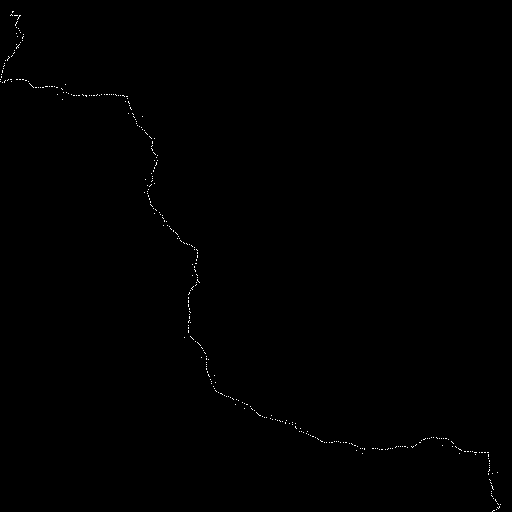

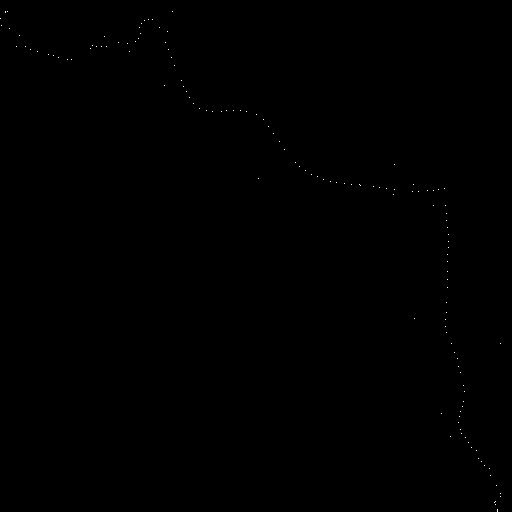

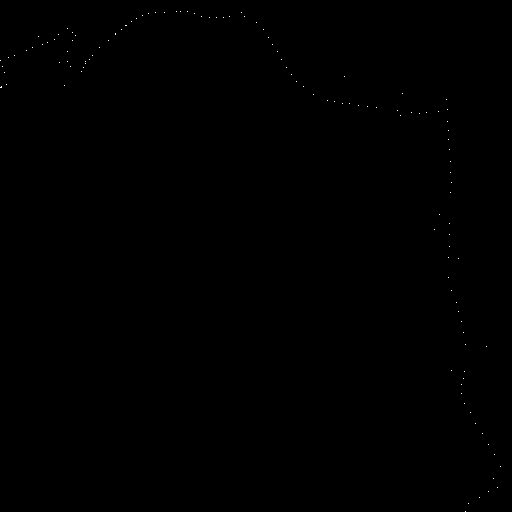

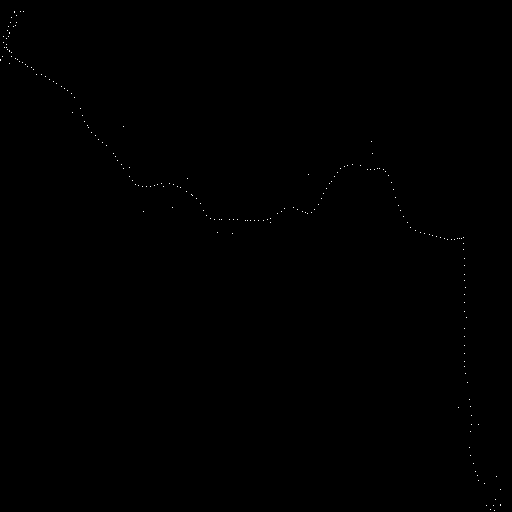

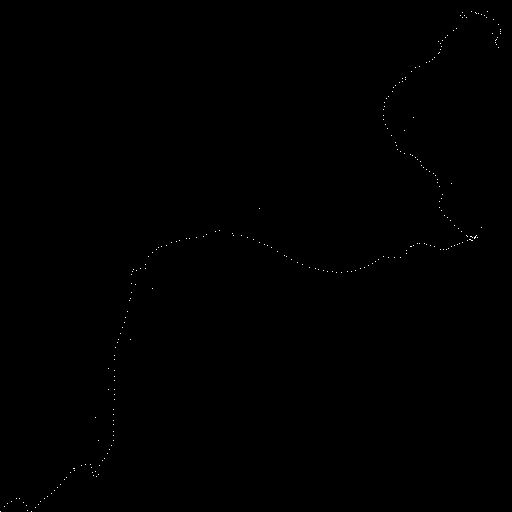

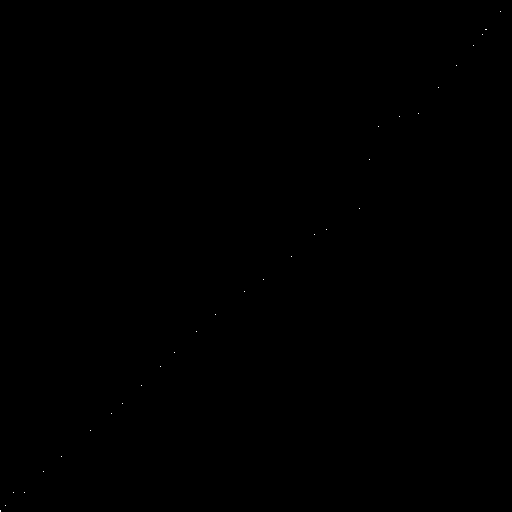

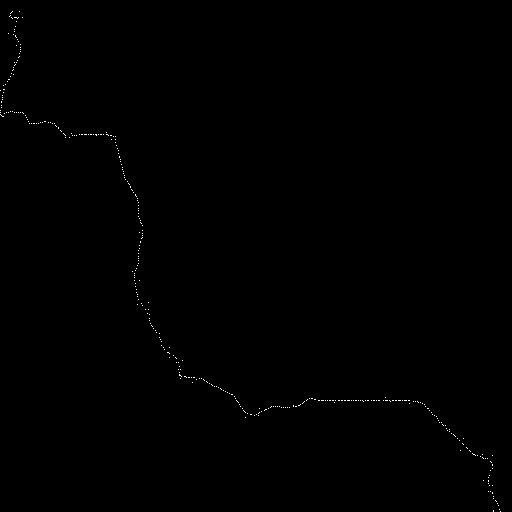

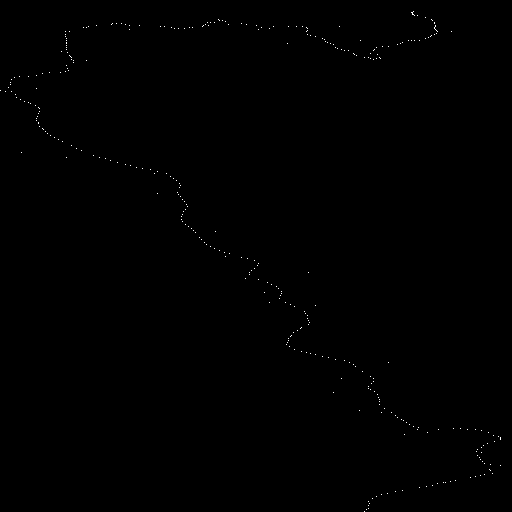

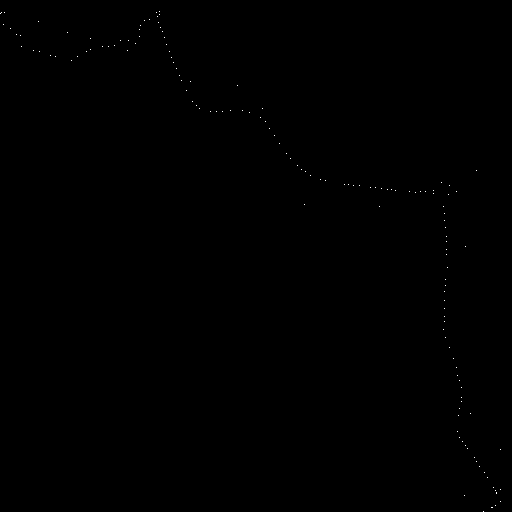

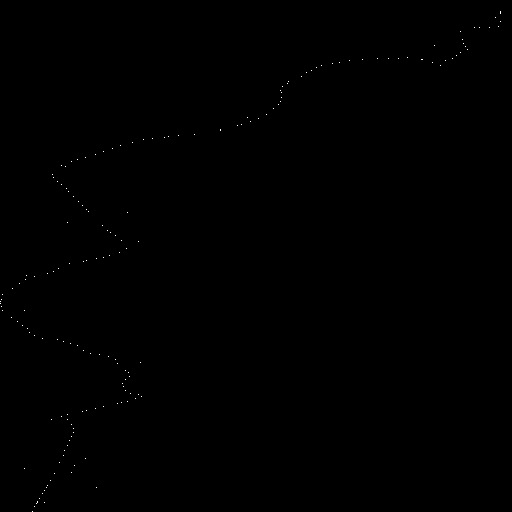

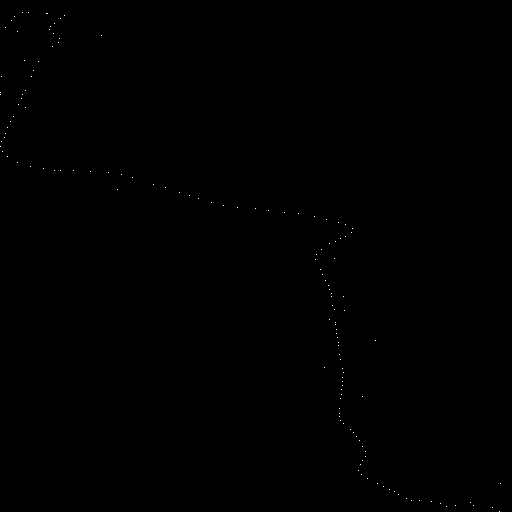

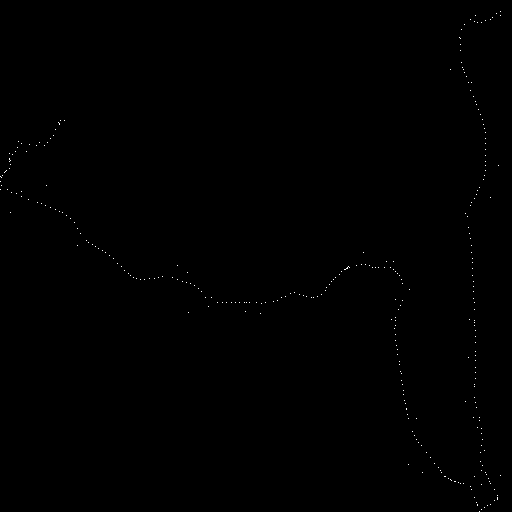

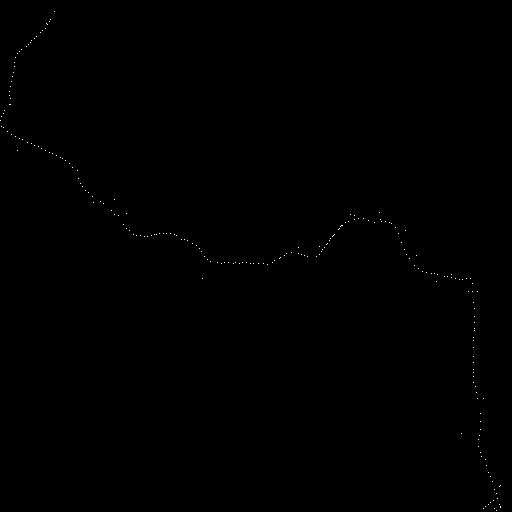

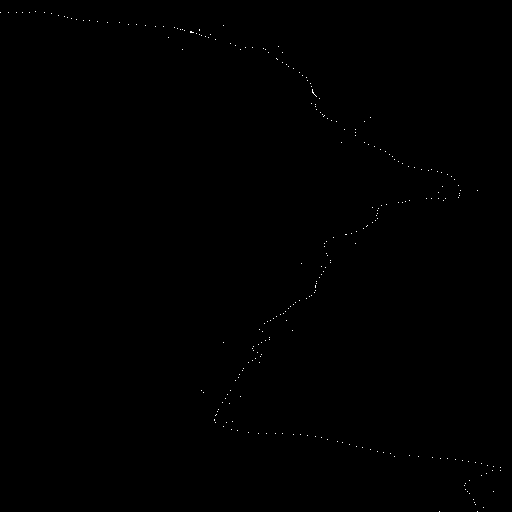

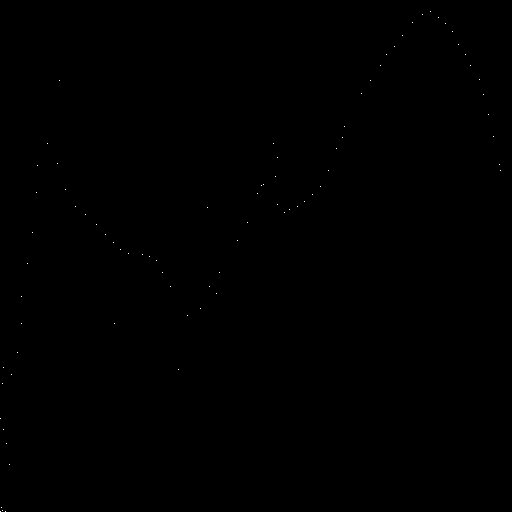

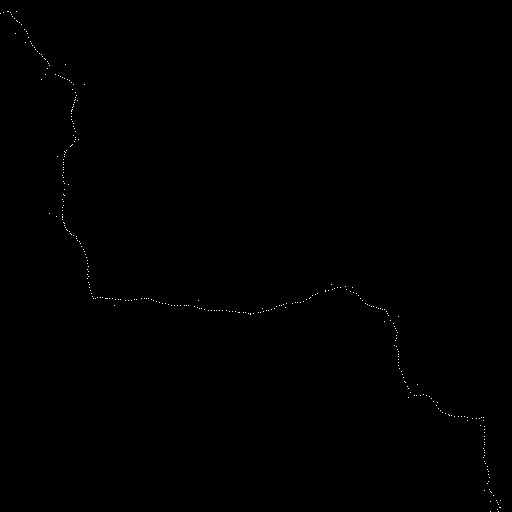

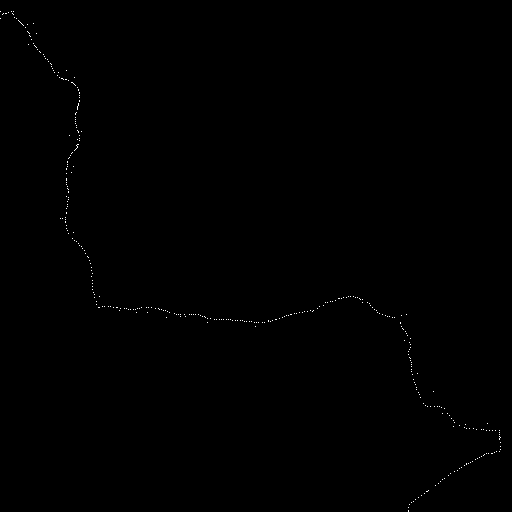

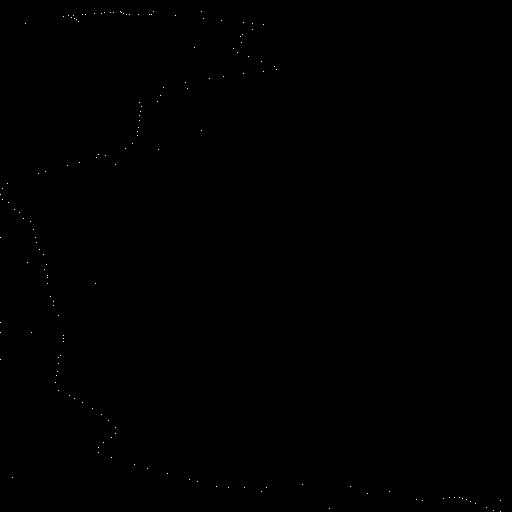

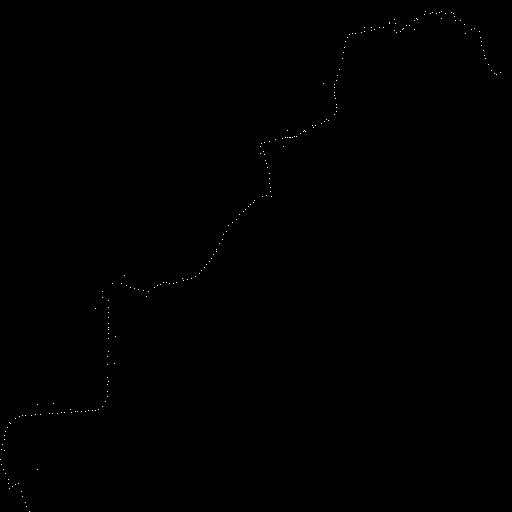

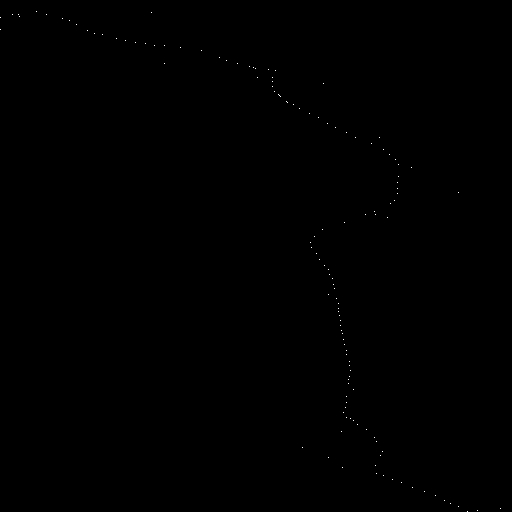

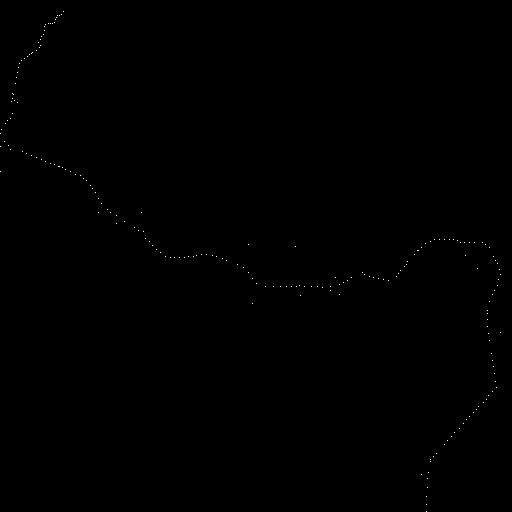

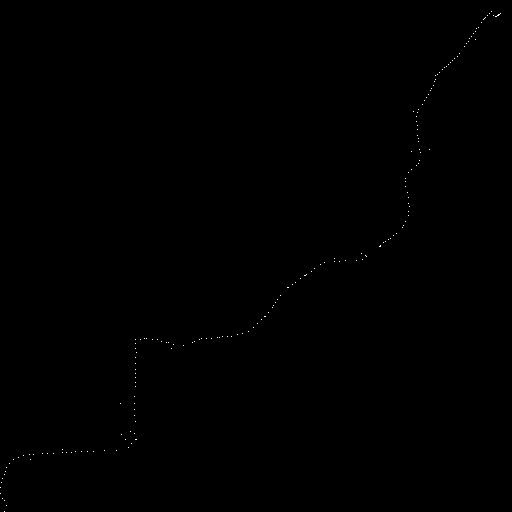

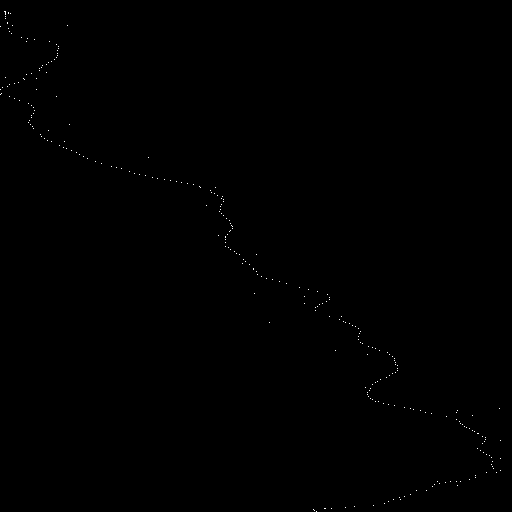

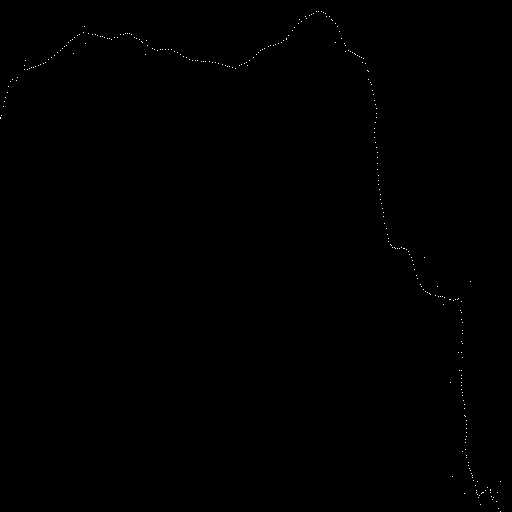

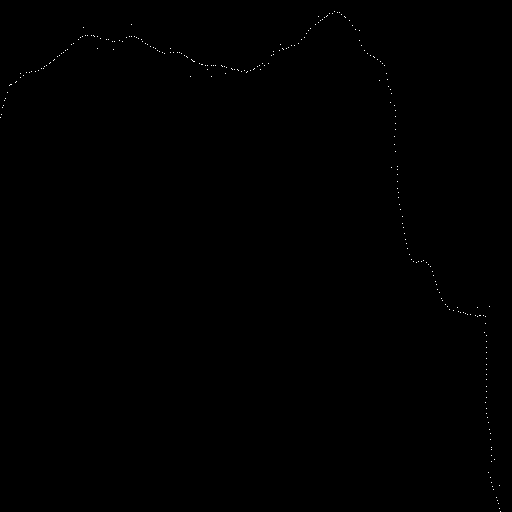

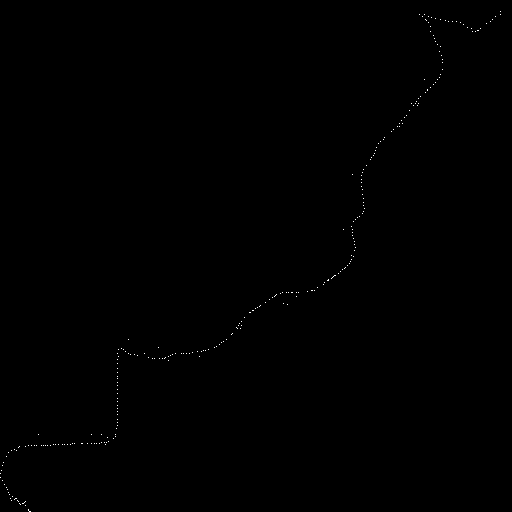

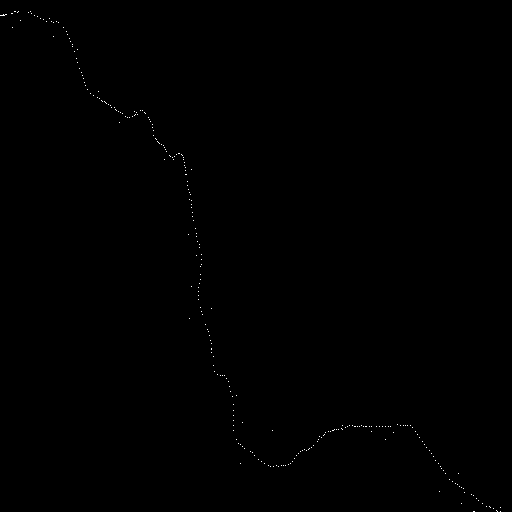

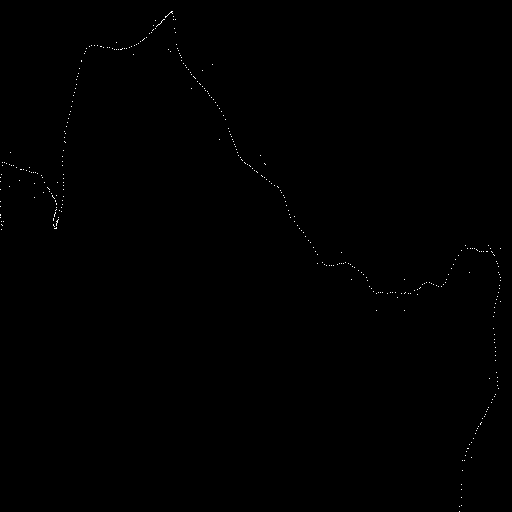

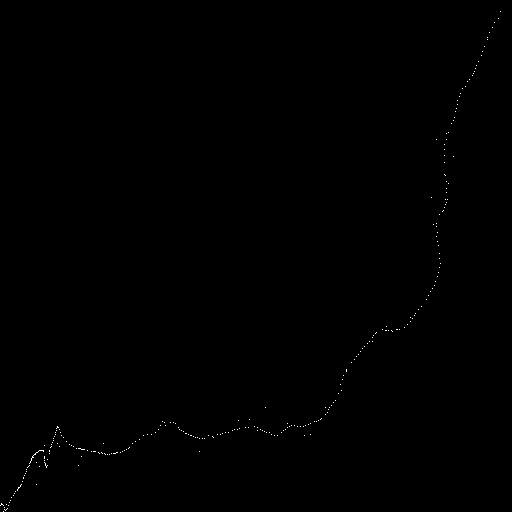

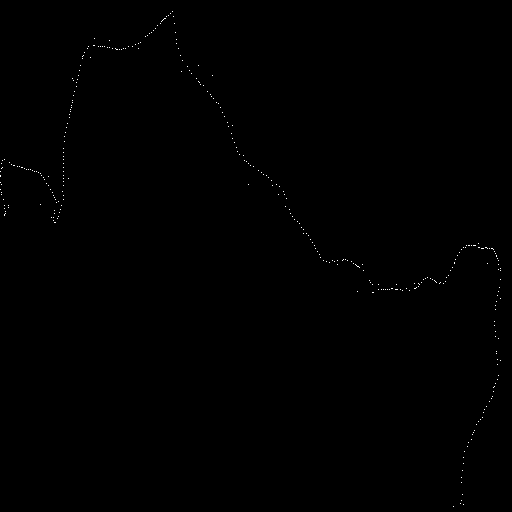

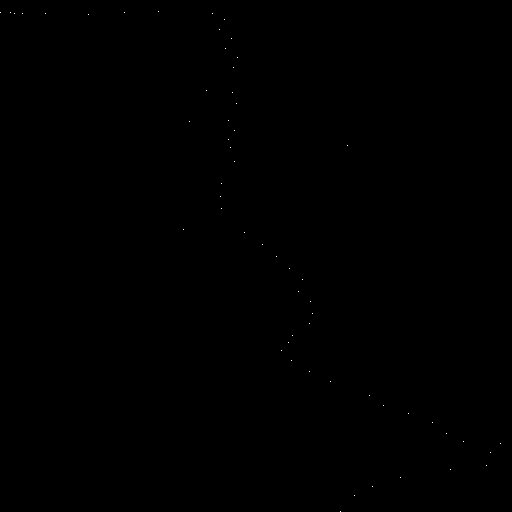

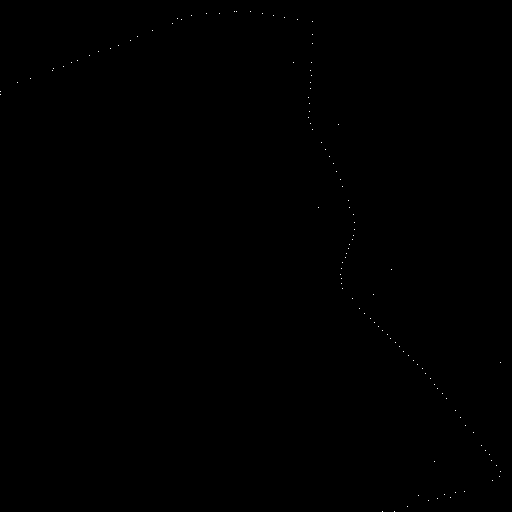

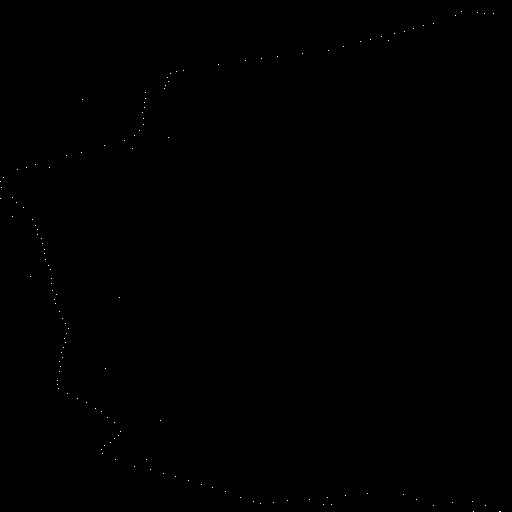

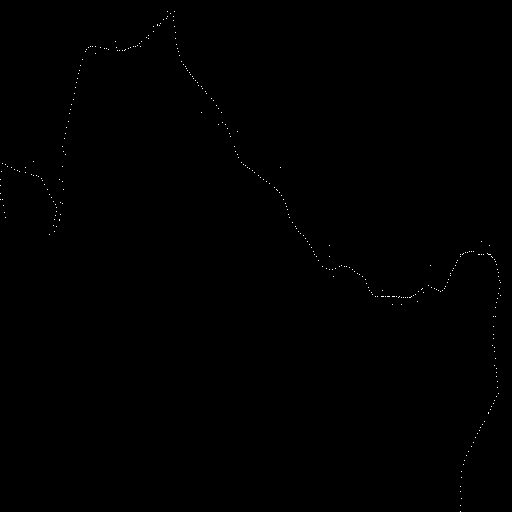

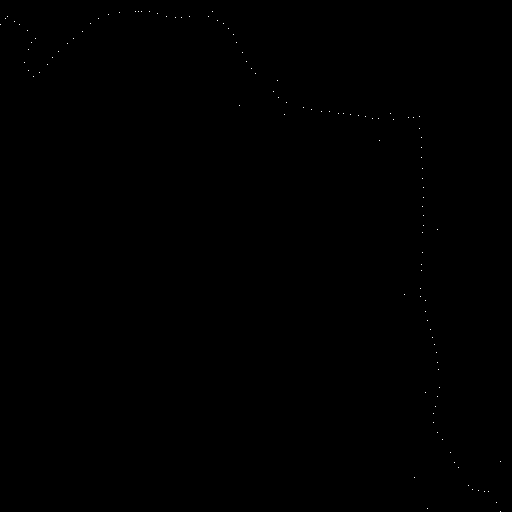

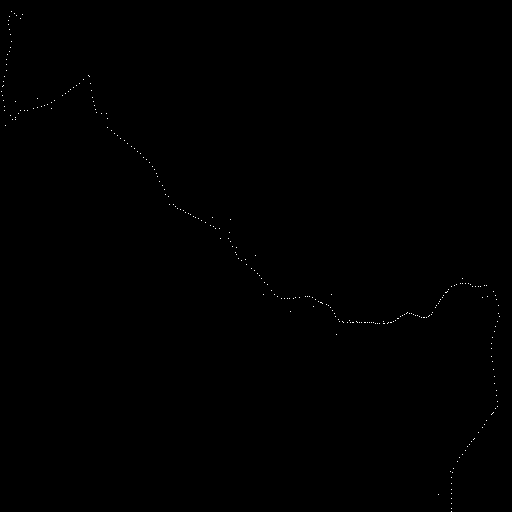

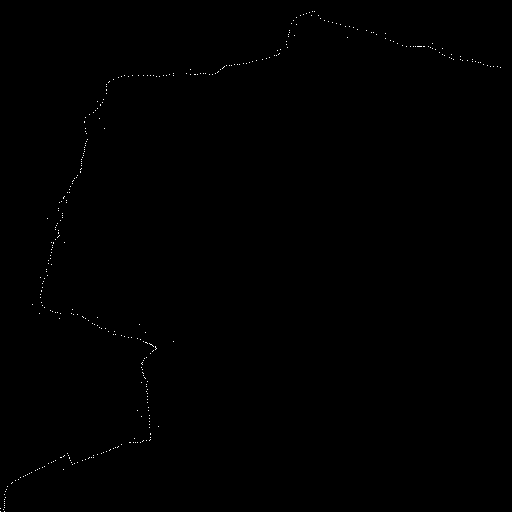

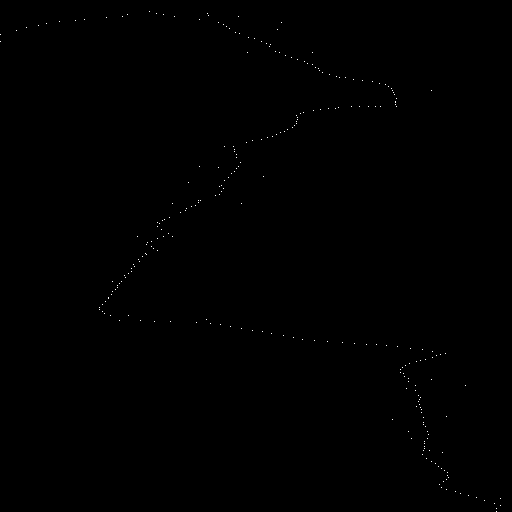

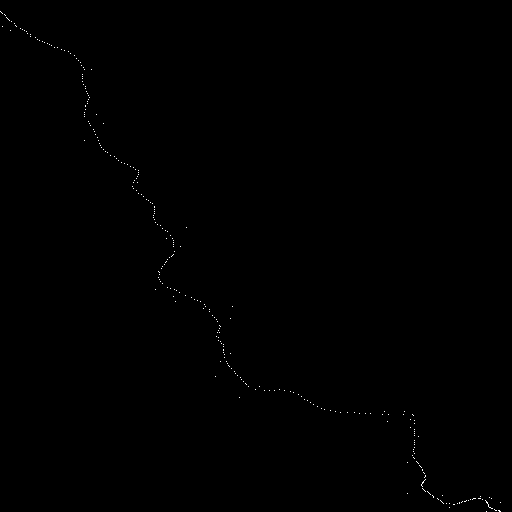

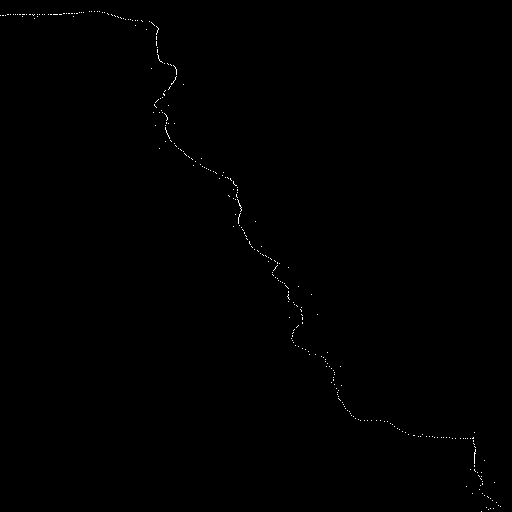

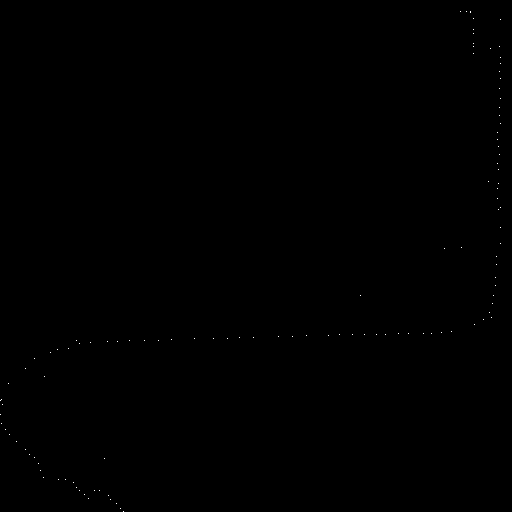

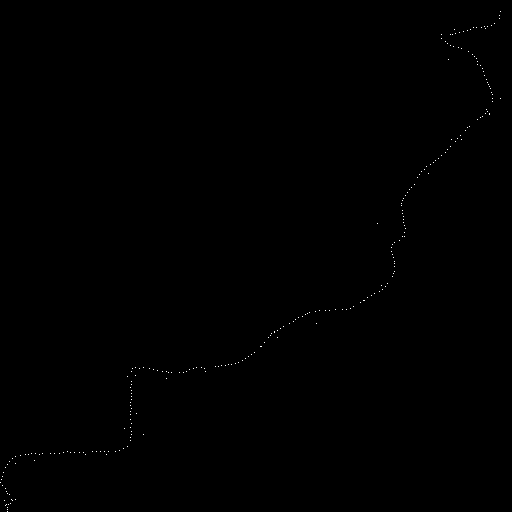

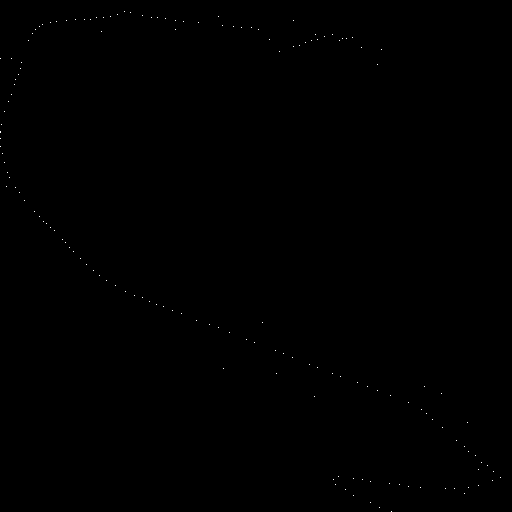

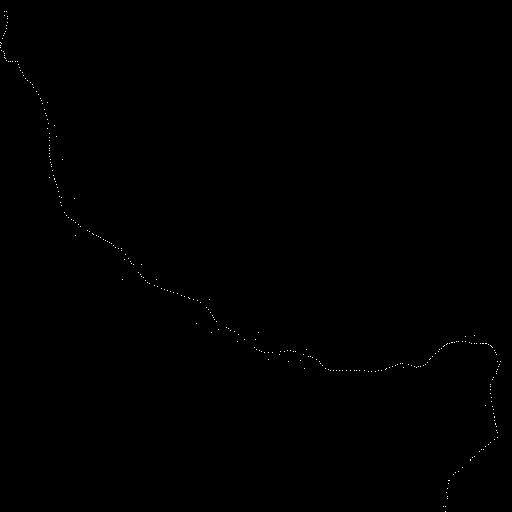

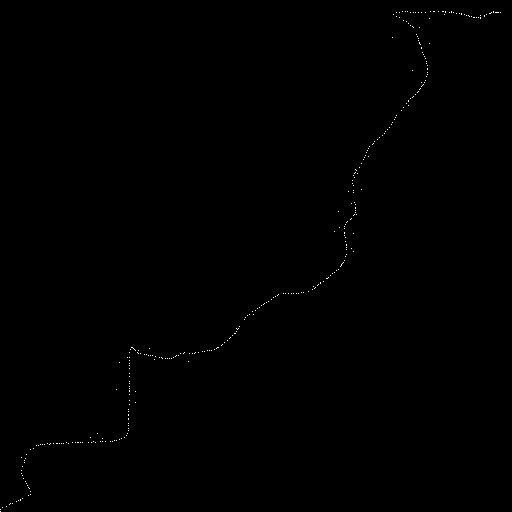

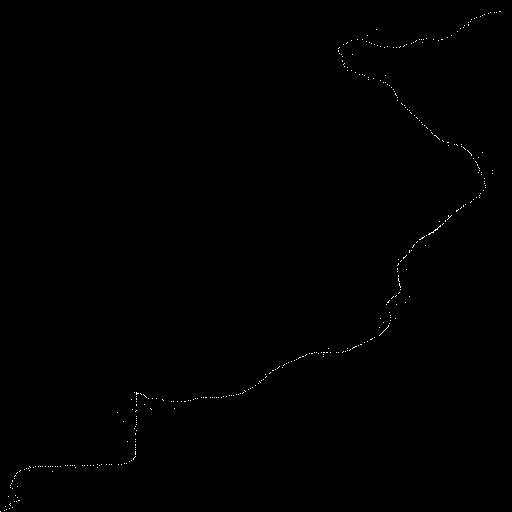

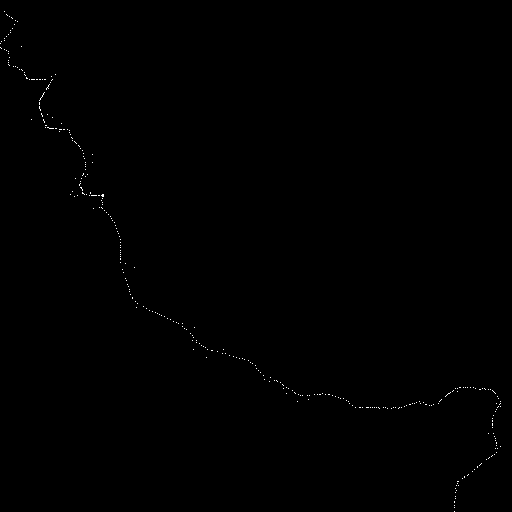

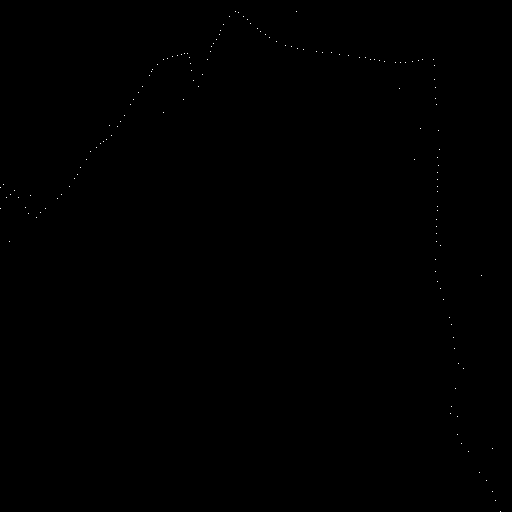

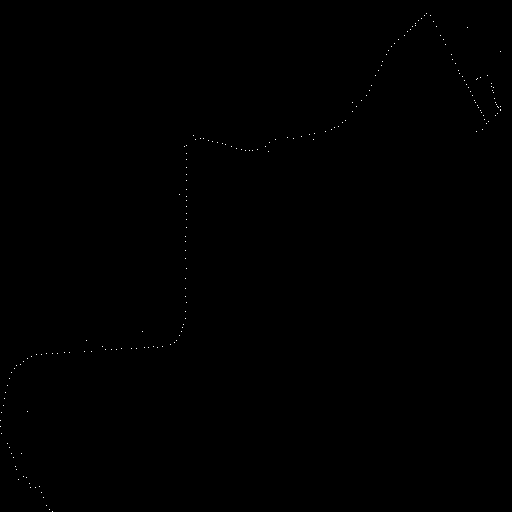

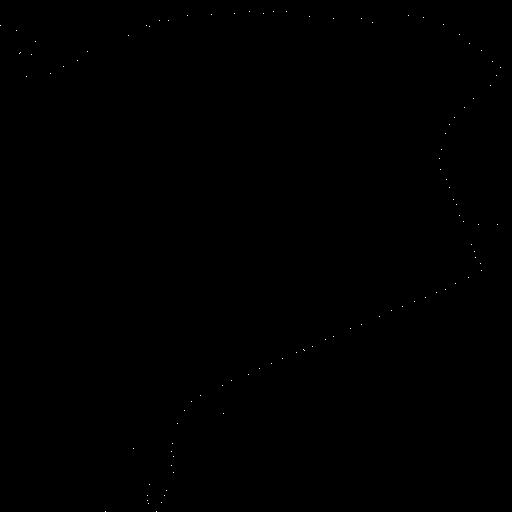

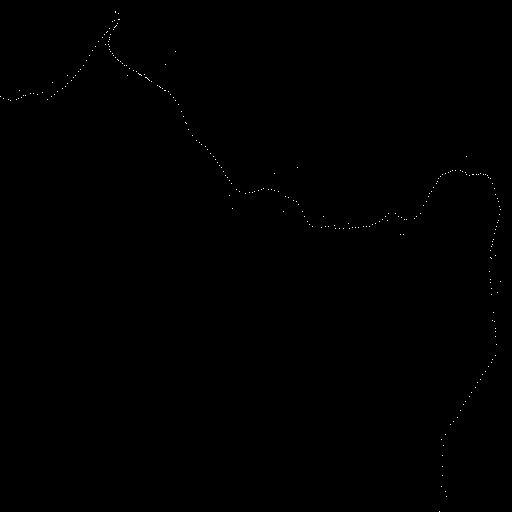

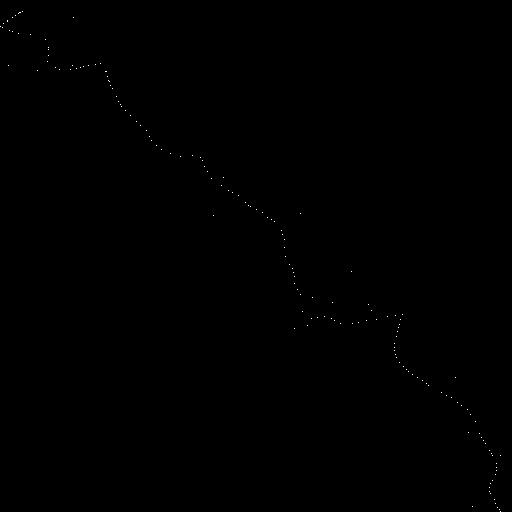

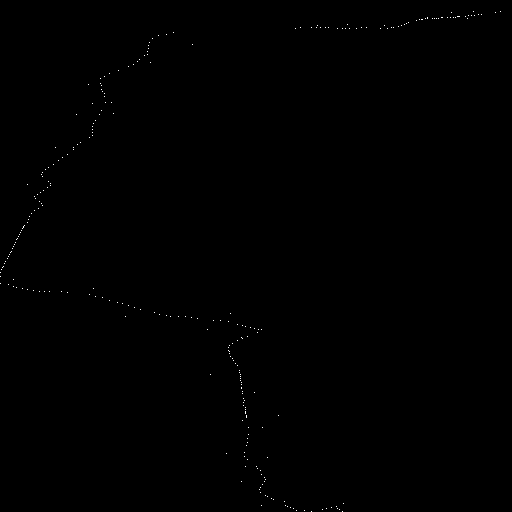

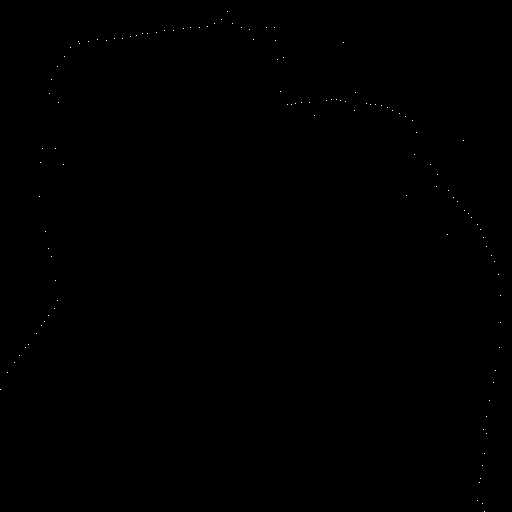

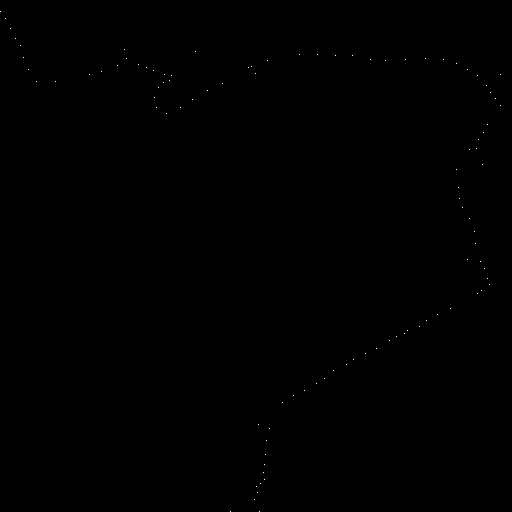

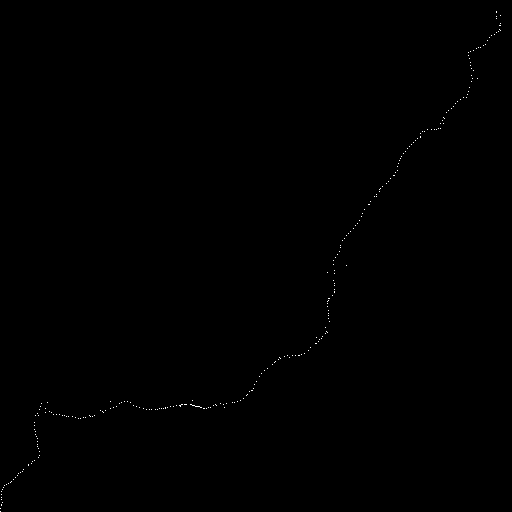

In [45]:
X_train, Y_train = [ ], [ ]

os.chdir( X_trainDir )
#X_trainFiles = glob.glob( '*png' )
X_trainFiles = glob.glob( '*csv' )
X_trainFiles = np.sort(X_trainFiles)
#print(X_trainFiles)

for f in X_trainFiles:
	csv_file = pd.read_csv(f, names=["lat","long","num"], header=None)
	minX,minY,maxX,maxY = coorMaxMin(csv_file)
	resultImage = map2Image_noise(minX,minY,maxX,maxY,csv_file)

	#X_train.append( GetImage( f ) )
	X_train.append(resultImage)


In [26]:
print(np.shape(X_train))

(56, 512, 512)
